<h2 style='color:blue' align="center">Decision Tree Classification</h2>

## Step 1: Import Libraries

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix


## Step 2 Load the IRIS DataSet

In [17]:
# Load iris dataset
iris = sns.load_dataset("iris")

# Features and target
X = iris.drop("species", axis=1)
y = iris["species"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


## Step 3: Create a Pipeline with Preprocessor + Classifier

In [18]:
pipeline = Pipeline([
    ("scaler", StandardScaler()), 
    ("classifier", DecisionTreeClassifier(random_state=42))
])


## Step 4: Hyperparameter Tuning with GridSearchCV

In [19]:
# Define parameter grid
param_grid = {
    "classifier__criterion": ["gini", "entropy"],
    "classifier__max_depth": [2, 3, 4, 5, None],
    "classifier__min_samples_split": [2, 3, 4],
    "classifier__min_samples_leaf": [1, 2, 3]
}

# GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Score:", grid_search.best_score_)


Best Parameters: {'classifier__criterion': 'gini', 'classifier__max_depth': 3, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best CV Score: 0.9523809523809523


## Step 5: Testing the Optimized Model

In [20]:
# Evaluate on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Test Accuracy:", best_model.score(X_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Test Accuracy: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.94      1.00      0.97        15
   virginica       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45


Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


## Step 6: Visualize the Decision Tree

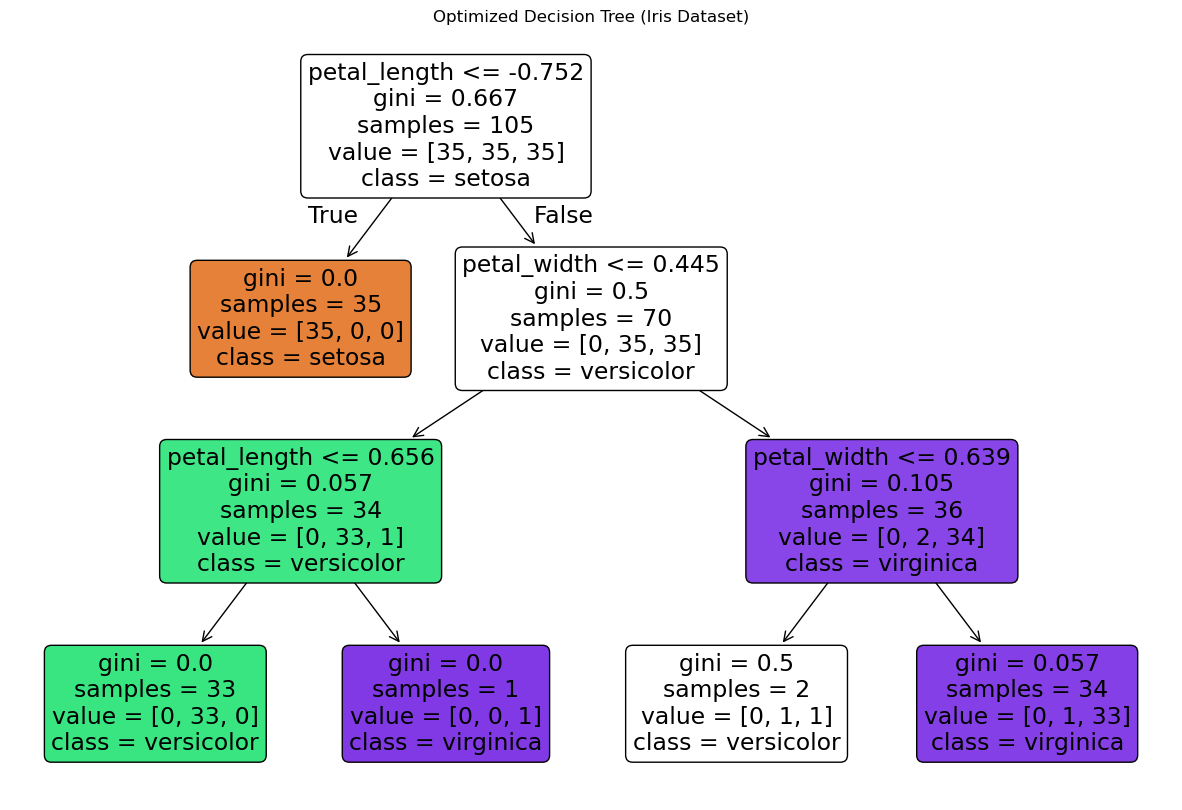

In [21]:
# Extract trained decision tree
tree_model = best_model.named_steps["classifier"]

plt.figure(figsize=(15,10))
plot_tree(tree_model, 
          feature_names=X.columns, 
          class_names=tree_model.classes_, 
          filled=True, 
          rounded=True)
plt.title("Optimized Decision Tree (Iris Dataset)")
plt.show()


## Step 5: Optional – Feature Importance

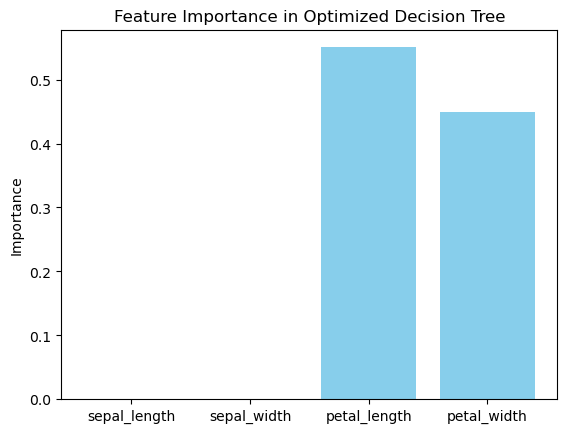

In [22]:
importances = tree_model.feature_importances_
plt.bar(X.columns, importances, color="skyblue")
plt.title("Feature Importance in Optimized Decision Tree")
plt.ylabel("Importance")
plt.show()
